Plots results for thesis

In [1]:
import random

import numpy as np
from matplotlib import pyplot as plt

random.seed(42)
import json
import seaborn as sns
import pandas as pd

from config import TLCPaths

In [3]:
with open(TLCPaths.project_data_path / "sapbert_accuracies.json", "r") as file:
    accuracies = json.load(file)
k_values = list(range(1, 11)) + [16, 32, 64]

### Plot all results

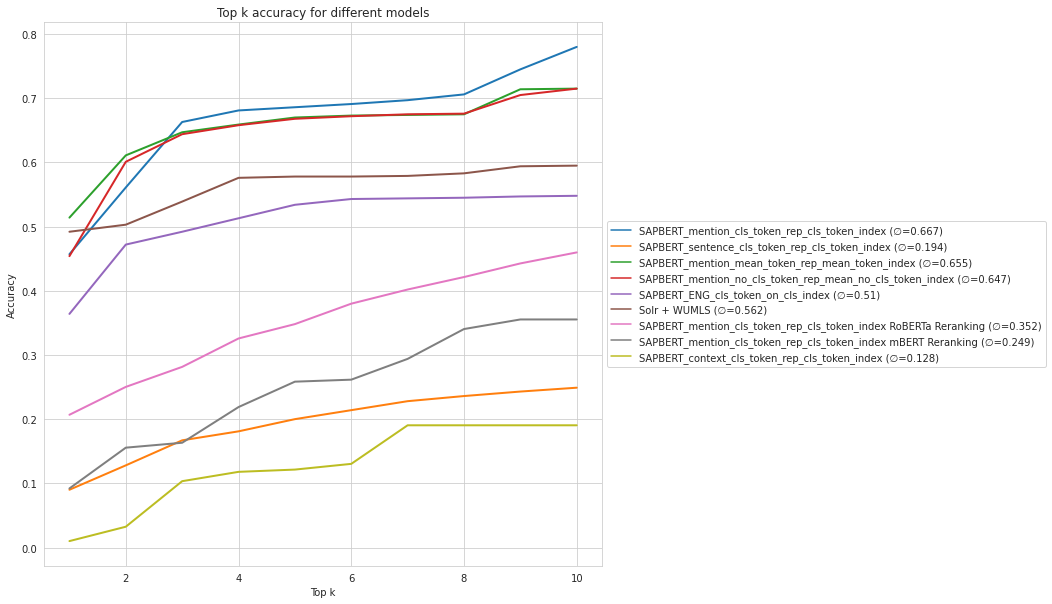

In [4]:
num_plot_values = 10
fig, ax = plt.subplots(figsize=(10, 10))

models_to_plot = [
    'SAPBERT_ENG_cls_token_on_cls_index',

    'SAPBERT_mention_cls_token_rep_cls_token_index RoBERTa Reranking',
    'SAPBERT_mention_cls_token_rep_cls_token_index mBERT Reranking',

    'SAPBERT_mention_cls_token_rep_cls_token_index',
    'SAPBERT_mention_mean_token_rep_mean_token_index',
    'SAPBERT_mention_no_cls_token_rep_mean_no_cls_token_index',

    'SAPBERT_sentence_cls_token_rep_cls_token_index',
    'SAPBERT_context_cls_token_rep_cls_token_index',

    'Solr + WUMLS'
]
# Create an empty DataFrame
temp_dfs = []
# Flatten and transform the data into a pandas DataFrame
for model_name, model_accs in accuracies.items():
    if model_name not in models_to_plot or False:
        continue
    temp_df = pd.DataFrame({
        'Top k': k_values[:num_plot_values],
        'Accuracy': model_accs[:num_plot_values],
        'Model': model_name + f" (∅={round(np.mean(model_accs[:num_plot_values]), 3)})"
    })
    temp_dfs.append(temp_df)
df = pd.concat(temp_dfs)

# Create a lineplot
sns.lineplot(data=df, x='Top k', y='Accuracy', hue='Model', ax=ax, linewidth=2)

ax.set_title('Top k accuracy for different models')
ax.grid(True)

# Move the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Plot different index results


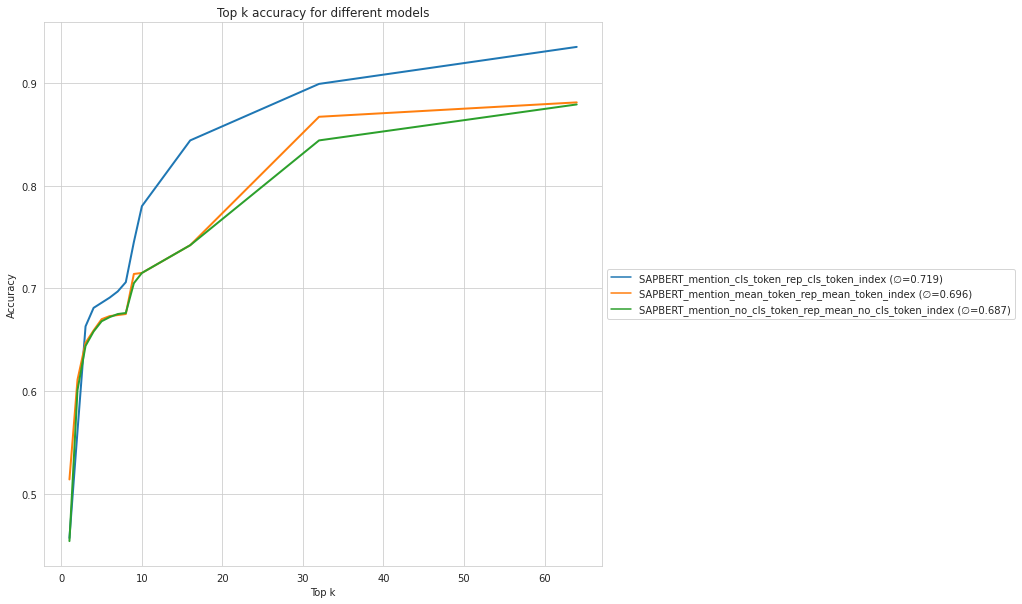

In [5]:
num_plot_values = None
fig, ax = plt.subplots(figsize=(10, 10))

models_to_plot = ['SAPBERT_mention_cls_token_rep_cls_token_index',
                  'SAPBERT_mention_mean_token_rep_mean_token_index',
                  'SAPBERT_mention_no_cls_token_rep_mean_no_cls_token_index',
                  ]

# Create an empty DataFrame
temp_dfs = []
# Flatten and transform the data into a pandas DataFrame
for model_name, model_accs in accuracies.items():
    if model_name not in models_to_plot:
        continue
    temp_df = pd.DataFrame({
        'Top k': k_values[:num_plot_values],
        'Accuracy': model_accs[:num_plot_values],
        'Model': model_name + f" (∅={round(np.mean(model_accs[:num_plot_values]), 3)})"
    })
    temp_dfs.append(temp_df)
df = pd.concat(temp_dfs)

# Create a lineplot
sns.lineplot(data=df, x='Top k', y='Accuracy', hue='Model', ax=ax, linewidth=2)

ax.set_title('Top k accuracy for different models')
ax.grid(True)

# Move the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## context information plots

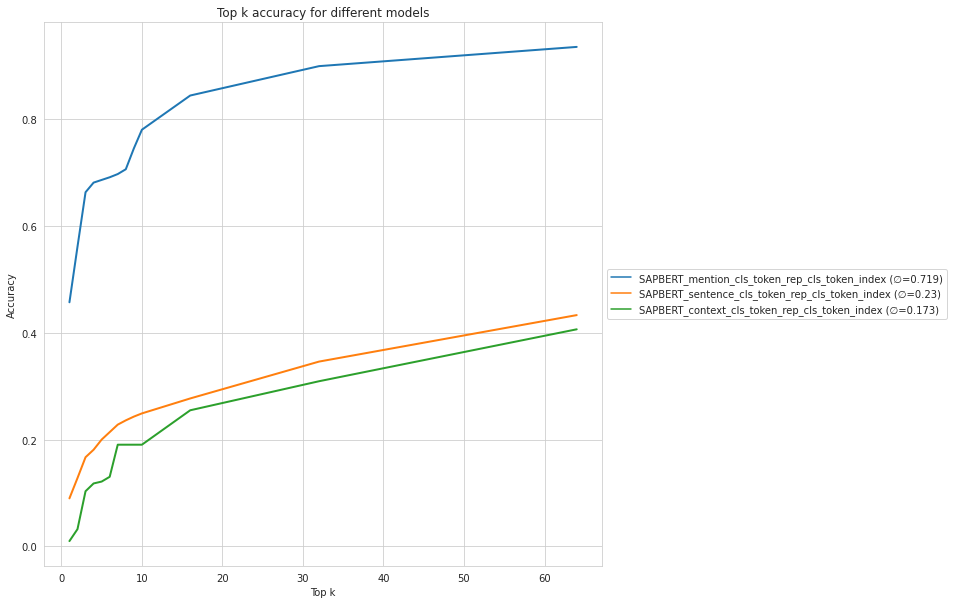

In [6]:
models_to_plot = [
    'SAPBERT_mention_cls_token_rep_cls_token_index',
    'SAPBERT_sentence_cls_token_rep_cls_token_index',
    'SAPBERT_context_cls_token_rep_cls_token_index'
]
num_plot_values = None
fig, ax = plt.subplots(figsize=(10, 10))

# Create an empty DataFrame
temp_dfs = []
# Flatten and transform the data into a pandas DataFrame
for model_name, model_accs in accuracies.items():
    if model_name not in models_to_plot:
        continue
    temp_df = pd.DataFrame({
        'Top k': k_values[:num_plot_values],
        'Accuracy': model_accs[:num_plot_values],
        'Model': model_name + f" (∅={round(np.mean(model_accs[:num_plot_values]), 3)})"
    })
    temp_dfs.append(temp_df)
df = pd.concat(temp_dfs)

# Create a lineplot
sns.lineplot(data=df, x='Top k', y='Accuracy', hue='Model', ax=ax, linewidth=2)

ax.set_title('Top k accuracy for different models')
ax.grid(True)

# Move the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Plot reranking results

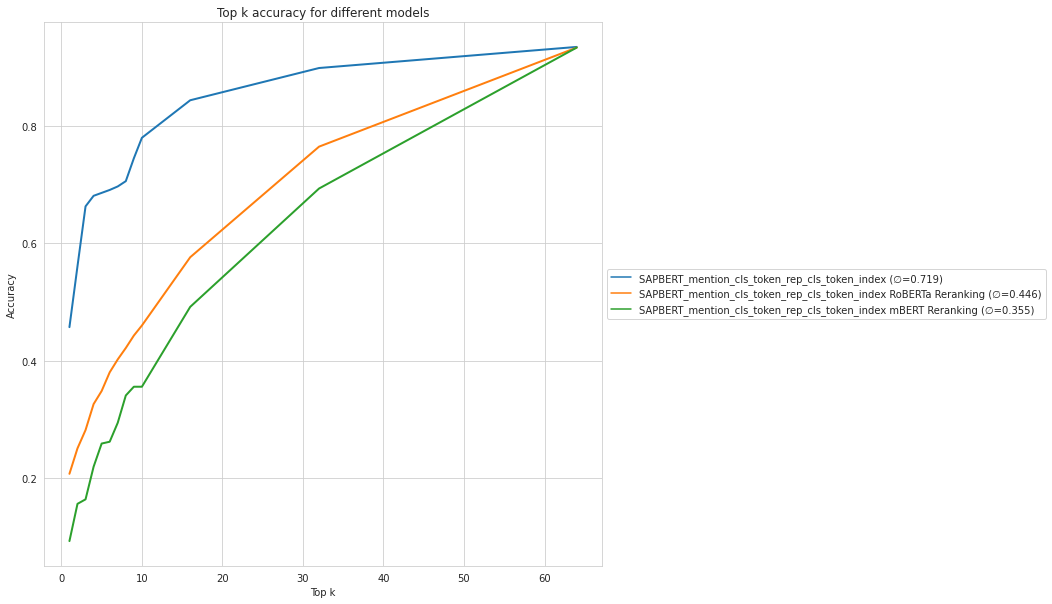

In [7]:
num_plot_values = None
fig, ax = plt.subplots(figsize=(10, 10))

# Create an empty DataFrame
temp_dfs = []
# Flatten and transform the data into a pandas DataFrame
for model_name, model_accs in accuracies.items():
    if 'SAPBERT_mention_cls_token_rep_cls_token_index' not in model_name:
        continue
    temp_df = pd.DataFrame({
        'Top k': k_values[:num_plot_values],
        'Accuracy': model_accs[:num_plot_values],
        'Model': model_name + f" (∅={round(np.mean(model_accs[:num_plot_values]), 3)})"
    })
    temp_dfs.append(temp_df)
df = pd.concat(temp_dfs)

# Create a lineplot
sns.lineplot(data=df, x='Top k', y='Accuracy', hue='Model', ax=ax, linewidth=2)

ax.set_title('Top k accuracy for different models')
ax.grid(True)

# Move the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Plot only top results

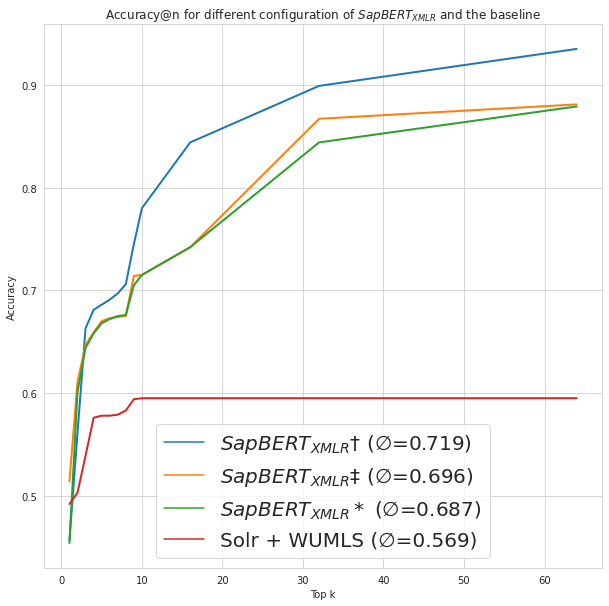

In [18]:
num_plot_values = None
fig, ax = plt.subplots(figsize=(10, 10))
models_to_plot = {
    'SAPBERT_mention_cls_token_rep_cls_token_index': "$SapBERT_{XMLR}\dag$",
    'SAPBERT_mention_mean_token_rep_mean_token_index': "$SapBERT_{XMLR}\ddag$",
    'SAPBERT_mention_no_cls_token_rep_mean_no_cls_token_index': "$SapBERT_{XMLR}*$",
    'Solr + WUMLS': "Solr + WUMLS",
}
# Create an empty DataFrame
temp_dfs = []
# Flatten and transform the data into a pandas DataFrame
for model_name, model_accs in accuracies.items():
    if model_name not in models_to_plot:
        continue
    else:
        model_name = models_to_plot[model_name]
    if model_accs[0] < 0.40:
        continue
    temp_df = pd.DataFrame({
        'Top k': k_values[:num_plot_values],
        'Accuracy': model_accs[:num_plot_values],
        'Model': model_name + f" (∅={round(np.mean(model_accs[:num_plot_values]), 3)})"
    })
    temp_dfs.append(temp_df)
df = pd.concat(temp_dfs)

# Create a lineplot
sns.lineplot(data=df, x='Top k', y='Accuracy', hue='Model', ax=ax, linewidth=2)

ax.set_title('Accuracy@n for different configuration of $SapBERT_{XMLR}$ and the baseline')
ax.grid(True)

# Move the legend outside the plot
plt.legend(loc='lower center', fontsize=20)  #, bbox_to_anchor=(1, 0.5))
plt.show()

In [22]:
pd.concat(temp_dfs)

,Top k,Accuracy,Model
0,1,0.457,$SapBERT_{XMLR}\dag$ (∅=0.719)
1,2,0.561,$SapBERT_{XMLR}\dag$ (∅=0.719)
2,3,0.663,$SapBERT_{XMLR}\dag$ (∅=0.719)
3,4,0.681,$SapBERT_{XMLR}\dag$ (∅=0.719)
4,5,0.686,$SapBERT_{XMLR}\dag$ (∅=0.719)
5,6,0.691,$SapBERT_{XMLR}\dag$ (∅=0.719)
6,7,0.697,$SapBERT_{XMLR}\dag$ (∅=0.719)
7,8,0.706,$SapBERT_{XMLR}\dag$ (∅=0.719)
8,9,0.745,$SapBERT_{XMLR}\dag$ (∅=0.719)
9,10,0.780,$SapBERT_{XMLR}\dag$ (∅=0.719)


## Training and validation loss

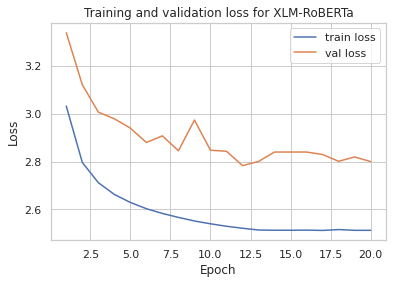

In [24]:
# training loss
roberta_train_loss = [3.031468629837036, 2.7960033416748047, 2.7116453647613525, 2.6623470783233643,
                      2.6289186477661133, 2.602739095687866, 2.5829198360443115, 2.566375494003296,
                      2.5514469146728516, 2.539632558822632, 2.5293240547180176, 2.5210533142089844,
                      2.5136539936065674, 2.512681312009733, 2.512670098843463, 2.5130251996776796,
                      2.511986677240654, 2.5155060493944608, 2.512358644540841, 2.512358644540841]

roberta_val_los = [3.338310782013291,
                   3.1209779409782463,
                   3.0064157716625646,
                   2.978680246662307,
                   2.9395303626659866,
                   2.87946952637618,
                   2.9072601153706175,
                   2.8447976051813346,
                   2.973300260857058,
                   2.847158155337467,
                   2.8429679190477475,
                   2.7828378350815706,
                   2.8002214432292156,
                   2.8396483820349774,
                   2.8396483820349774,
                   2.8396483820349774,
                   2.829384682556805,
                   2.8009031116234078,
                   2.8190541729644445,
                   2.799805321313927]

plt.plot(np.arange(1, 21), roberta_train_loss, label="train loss")
plt.plot(np.arange(1, 21), roberta_val_los, label="val loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss for XLM-RoBERTa')
plt.legend()
plt.show()


## Distribution of tokens in concept names and mentions

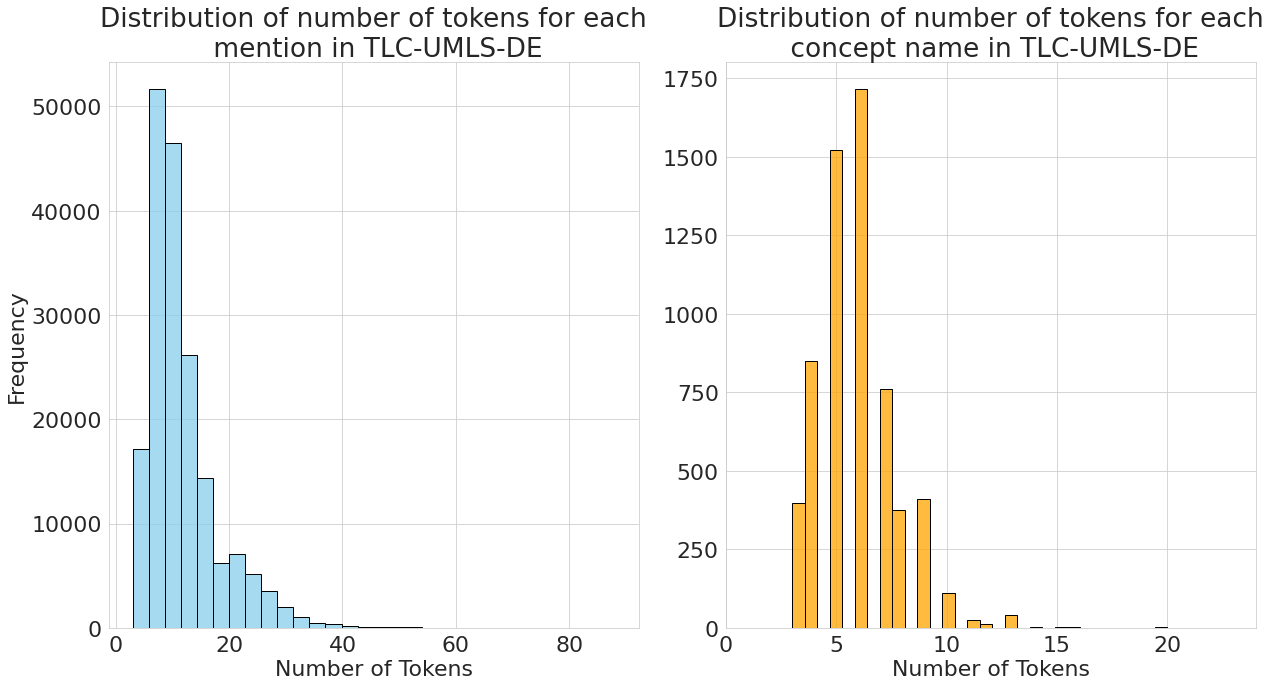

In [3]:
# token lengths
import json
import seaborn as sns
import pandas as pd
from config import TLCPaths
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 22})

# Load the concept_token_lens.json file
with open(TLCPaths.project_data_path / "concept_token_lens.json", "r") as file:
    concept_token_lens = json.load(file)
with open(TLCPaths.project_data_path / "mention_token_lens.json", "r") as file:
    mention_token_lens = json.load(file)

# Convert the dictionary values (list of token lengths) to a pandas Series
token_lens_series = pd.Series(concept_token_lens)
mention_lens_series = pd.Series(mention_token_lens)

fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

# Plot a histogram using seaborn
sns.histplot(token_lens_series, bins=30, color='skyblue', edgecolor='black', ax=ax1)
ax1.set_title('Distribution of number of tokens for each\n mention in TLC-UMLS-DE')
ax1.set_xlabel('Number of Tokens')
ax1.set_ylabel('Frequency')

hist = sns.histplot(mention_lens_series, bins=30, color='orange', edgecolor='black', ax=ax2)
ax2.set_title('Distribution of number of tokens for each\n concept name in TLC-UMLS-DE')
ax2.set_xlabel('Number of Tokens')
ax2.set_ylabel("")
hist.set(xlim=(0, 24))

import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 22})

plt.tight_layout()
plt.show()



In [30]:
with open(TLCPaths.project_data_path / 'all_accuracies.json', 'w') as file:
    json.dump(accuracies, file, indent=4)